In [1]:
import tensorflow as tf
from tensorflow import nn, math
from tensorflow.keras import datasets, utils, optimizers, Sequential, backend
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from tensorflow.keras.backend import clear_session
import matplotlib.pyplot as plt
import numpy as np
from IPython import display
import time

In [8]:
def history_plot(history):
    fig, axs = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(10, 5))

    axs[0].plot(history.history['loss'], label='loss')
    axs[0].plot(history.history['val_loss'], label='val_loss')
    axs[0].set_xlabel('epoch')
    axs[0].legend()
    axs[1].plot(history.history['accuracy'], label='accuracy')
    axs[1].plot(history.history['val_accuracy'], label='val_accuracy')
    axs[1].set_xlabel('epoch')
    axs[1].legend()
    plt.show()

def softmax(x):
    return math.exp(x) / math.reduce_sum(math.exp(x))

def customLoss(true_labels, logits):
    return -math.reduce_sum(true_labels * math.log(softmax(logits)))

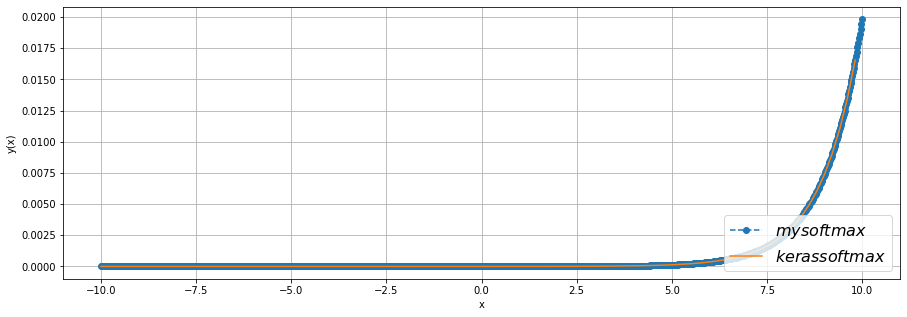

In [3]:
x_plot = np.linspace(-10, 10, 1000)
fig, axs = plt.subplots(nrows=1, ncols=1, figsize = (15, 5))
axs.plot(x_plot, softmax(x_plot), 'o--',label='$my softmax$')
axs.plot(x_plot[::10], nn.softmax(x_plot)[::10], label='$keras softmax$')
axs.set_xlabel('x')
axs.set_ylabel('y(x)')
axs.grid()
axs.legend(loc='lower right', fontsize=16)
plt.show()

In [4]:
num_classes = 10
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()


# x_train = utils.normalize(x_train, axis=1)
# x_test = utils.normalize(x_test, axis=1)

x_train = x_train / 255.
x_test = x_test / 255.
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

y_train_cat = utils.to_categorical(y_train, num_classes)
y_test_cat = utils.to_categorical(y_test, num_classes)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


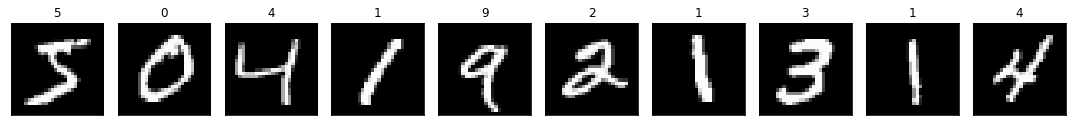

In [5]:
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axs.flat):
	ax.imshow(x_train[i], cmap='gray')
	ax.set_title(chr(y_train[i] + 48))
plt.tight_layout()
plt.show()

In [9]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))

model.compile(	optimizer=optimizers.Adam(learning_rate=0.001), 
				loss=customLoss, 
				metrics=['accuracy']
				)

In [10]:
start = time.time() 
history = model.fit(x_train, y_train_cat, validation_split=0.2, epochs=50, batch_size=2048)
display.clear_output()
print('Время вычислений:', time.time() - start)
clear_session()

Время вычислений: 10.14296293258667


In [11]:
val_loss, val_acc = model.evaluate(x_test, y_test_cat)
print('Val(test set) accuracy: ', val_acc)
print('Accuracy: ', history.history['accuracy'][-1])
print('Val accuracy: ', history.history['val_accuracy'][-1])

313/313 [==============================] - 1s 2ms/step - loss: 114.2128 - accuracy: 0.9737
Val(test set) accuracy:  0.9736999869346619
Accuracy:  0.9701250195503235
Val accuracy:  0.9729166626930237


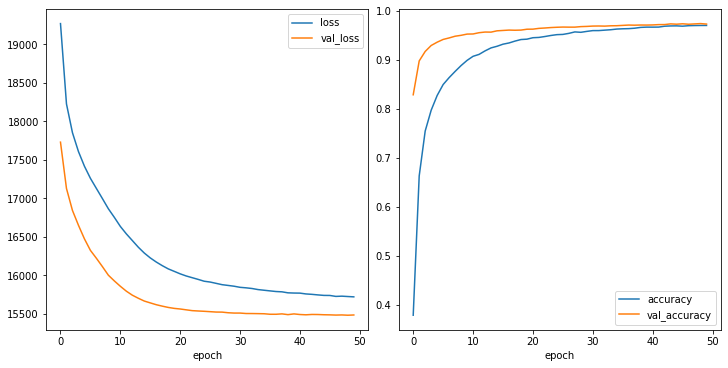

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [12]:
history_plot(history)
model.summary()

In [13]:
val_acc_list = []
for i in range(num_classes):
	mask = y_test == i
	val_loss, val_acc = model.evaluate(x_test[mask], y_test_cat[mask])
	val_acc_list.append(val_acc)
display.clear_output()
for i in range(num_classes):
	ch = chr(i + 48)
	print(f'{ch}: ', round(val_acc_list[i], 4))

0:  0.9908
1:  0.9868
2:  0.9709
3:  0.9752
4:  0.9664
5:  0.9787
6:  0.9729
7:  0.9669
8:  0.9733
9:  0.9544


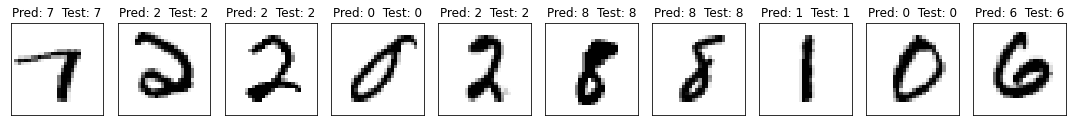

In [16]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis=1)

rs = np.random.randint(0, len(predictions), 10)

# Вывод 10 результатов
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axs.flat):
    idx = rs[i]
    ax.imshow(x_test[idx], cmap=plt.cm.binary)
    ax.set_title('Pred: ' + chr(predictions[idx] + 48) + '  Test: ' + chr(y_test[idx] + 48))
plt.tight_layout()
plt.show()

263


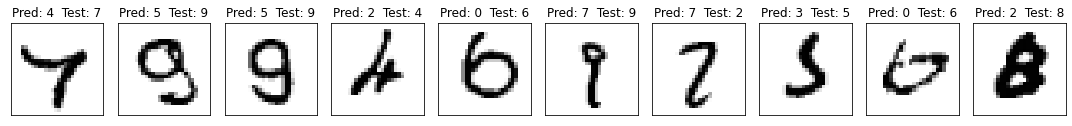

In [15]:
# Выделение неверных вариантов
mask = predictions == y_test

x_false = x_test[~mask]
pred_false = predictions[~mask]
print(len(pred_false))
y_false = y_test[~mask]

# Вывод 10 неверных результатов
fig, axs = plt.subplots(nrows=1, ncols=10, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axs.flat):
    ax.imshow(x_false[i], cmap=plt.cm.binary)
    ax.set_title('Pred: ' + chr(pred_false[i] + 48) + '  Test: ' + chr(y_false[i] + 48))
plt.tight_layout()
plt.show()